In [1]:
from google.colab import drive
drive.mount('/content/drive') #add drive content to the notebook

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
'''Locate the directory which has the dataset'''
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/Hands-On_Machine_Learning_with_Scikit-Learn_and_TensorFlow/data

/content/drive/My Drive/Colab Notebooks/Hands-On_Machine_Learning_with_Scikit-Learn_and_TensorFlow/data


In [64]:
!pip3 install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


#Get the Data

##Download Data
write a small script to fetch data

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [0]:
fetch_housing_data()

load the data

In [0]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)

##Take a Quick Look at the Data Structure
use the DataFrame's **head()** method

In [266]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


use the **info()** method to get a quick description of the data

In [267]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


use the **value_counts()** method to find out what categoreis exist and how many districts belong to each category in the **ocean_proximity** column

In [268]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

use **describe()** method to show a summary of the numerical attributes

In [269]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


use the **hist()** method to plot the entire dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ce20e5a90>,
      dtype=object)

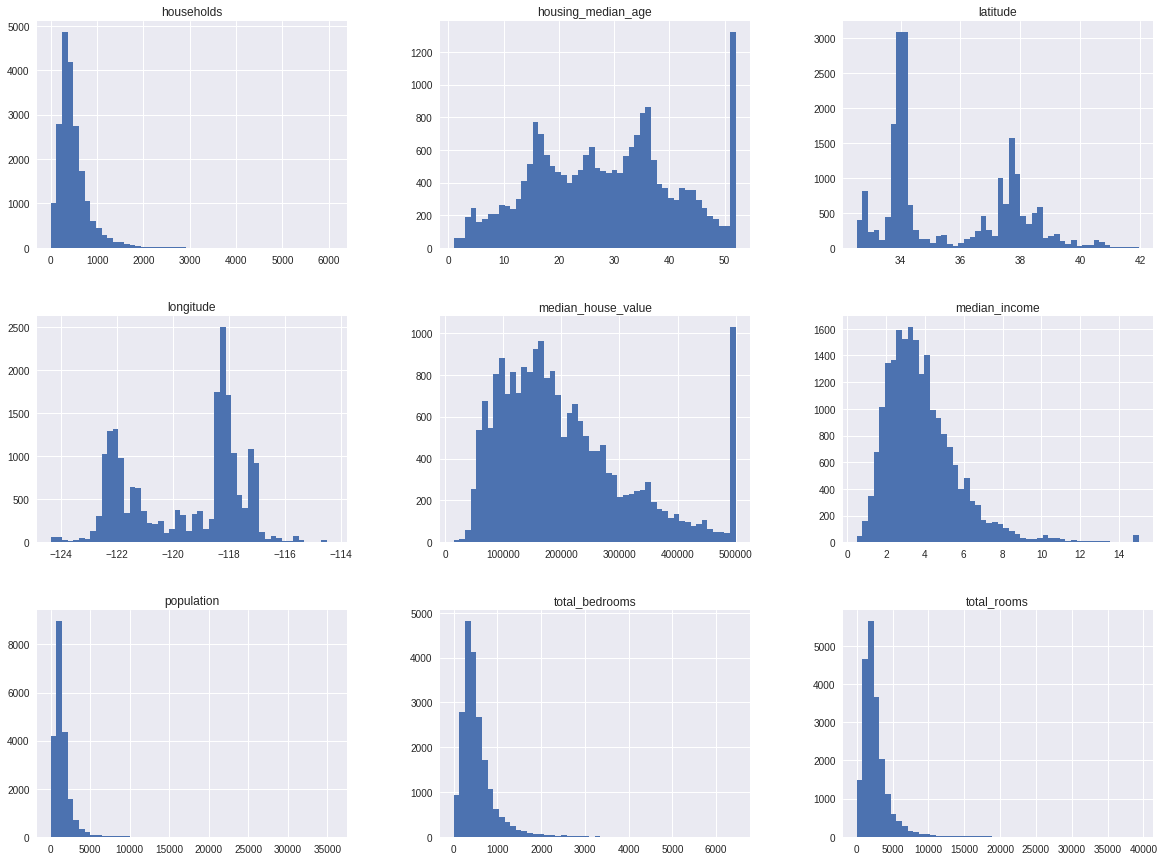

In [270]:
housing.hist(bins=50, figsize=(20,15))

##Create a Test Set
need to split dataset into training set and test set

In [0]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  
  return data.iloc[train_indices], data.iloc[test_indices]
# function generates different numbers without setting the random.seed()

In [272]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')

16512 train + 4128 test


In [0]:
# Sci-kit Learn
from sklearn.model_selection import train_test_split
train_set, test_test = train_test_split(housing, test_size=0.2, random_state=1)

Random sampling method is not good enough if the dataset is small because the test set may not capture the statistics of the entire dataset and introduce a significant sampling bias.
Use the *stratified sampling* method to make sure the test set is repreesentative of the overall dataset.

If the median income in this analysis is the most important feature, you may want to make sure the test set is representative in the whole dataset.

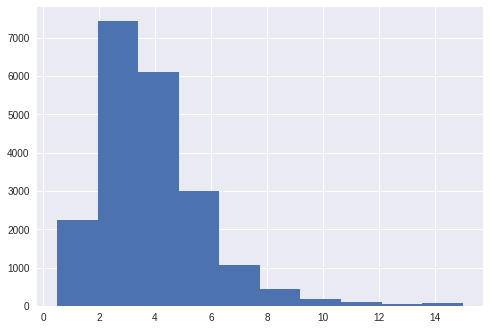

In [274]:
housing['median_income'].hist()

As you can see, most of the median income are in the range of 2-6. If we categorize the median income into 5 catogories,

In [275]:
# Divide by 1.5 to limit the number of income catogories
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# Label those above 5 as 5
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
#    ^DataFrame.where(cond,VALUE) => cond=True,keep orginial value, cond=False, replace VALUE
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

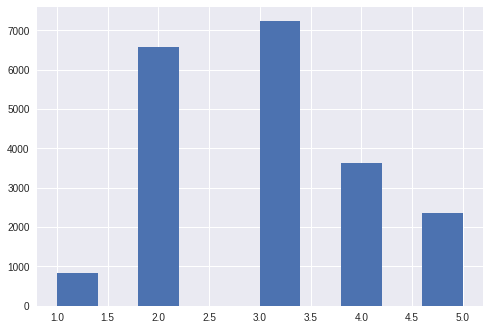

In [276]:
housing['income_cat'].hist()

Now apply stratified sampling based on the income category

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

Now we can compare how different the test sets based on different sampling methods

In [278]:
def income_cat_proportions(data):
  return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1)

compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = compare_props['Random'] / compare_props['Overall'] *100 -100
compare_props['Strat. %error'] = compare_props['Stratified'] / compare_props['Overall']*100 -100
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.039729,-0.243309,-0.243309
2.0,0.318847,0.326793,0.318798,2.492022,-0.015195
3.0,0.350581,0.344234,0.350533,-1.810392,-0.013820
4.0,0.176308,0.178295,0.176357,1.126683,0.027480
5.0,0.114438,0.110950,0.114583,-3.048264,0.127011


As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

Now we can remove the **income_cat** to keep the data in its original form

In [0]:
for i in (strat_train_set, strat_test_set):
  i.drop(['income_cat'], axis=1, inplace=True)

#Discover and Visualize the Data to Gain Insights
create a copy of the training set before exploring the dataset

In [0]:
housing = strat_train_set.copy()

##Visualizing Geographical Data

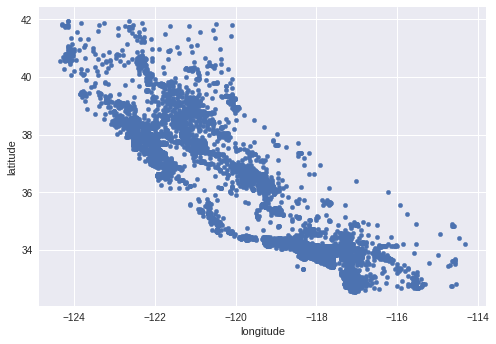

In [281]:
housing.plot(kind='scatter', x='longitude', y='latitude')

There are too many data points... set **alpha** option to 0.1 to see in a better view

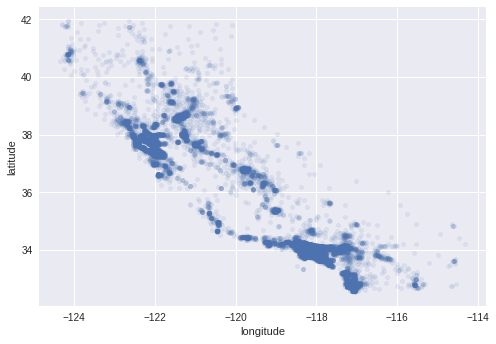

In [282]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

We can plot a graph about the housing prices. The radius of each circle represents the district's population (option **s**), the color represents the price (option **c**)

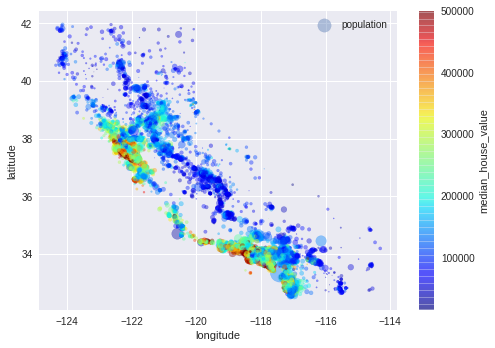

In [283]:
import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population',
          # ^size of each point
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()

##Looking for Corrletions
easily check the linear correlation coefficient:

In [284]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Coefficients close to zero mean that there is no
linear correlation. It may completely miss out on nonlinear relationships.

We can also the **scatter_matrix()** function in Pandas,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cde578ef0>,
      dtype=object)

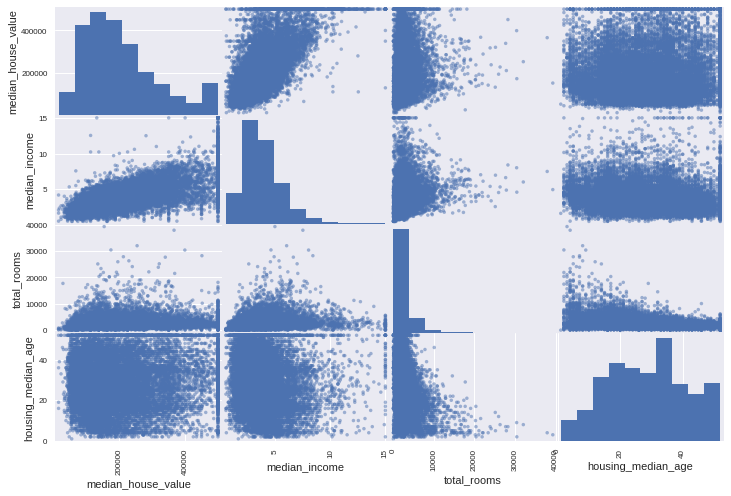

In [285]:
from pandas.tools.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

We can see the **median_income** and the **median_house_value** have a strong correlation, 

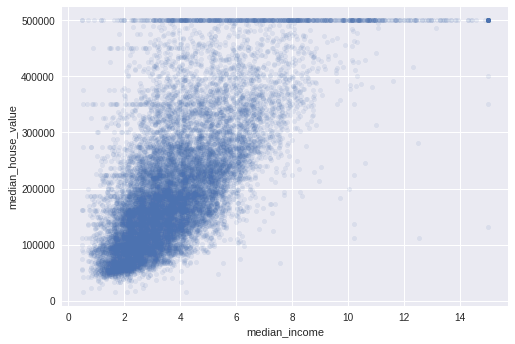

In [286]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

##Experiemnting with Attribute Combinations

In [287]:
housing['rooms_per_household'] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
Name: median_house_value, dtype: float64

[0, 5, 0, 520000]

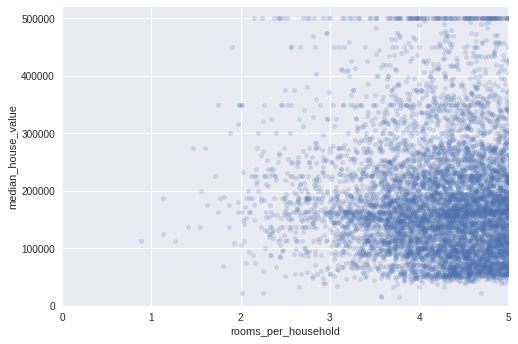

In [288]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])

#Prepare the Data for Machine Learning Algorithms
Separate the training set intor the training data and training labels

In [0]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

##Data Cleaning
three options to deal with missing data
1. **dropna()**, get rid of the corresponding districts


    housing.dropna(subset=['total_bedrooms'])

2. **drop()**, get rid of the whole attribute

    
    housing.drop('total_bedrooms', axis=1)

3. **fillna()**, set the missing values to some value


    median = housing['total_bedrooms'].median()
    housing['total_bedrooms'].fillna(median)

In [290]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows
#missing data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
11449,-117.98,33.68,24.0,4177.0,NaN,1704.0,606.0,6.2473,<1H OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
15479,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN
4043,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,<1H OCEAN


**Imputer** in Sci-kit learn,

If we want to replace each attribute's missing values with the median of that attribute,

In [0]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

Need to remove non-numerical attributes before using **Imputer**,

In [292]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [293]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [294]:
# make sure the result is consistent with the median values
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [295]:
X = imputer.transform(housing_num)
X

array([[-1.2213e+02,  3.7670e+01,  4.0000e+01, ...,  9.1400e+02,
         3.1700e+02,  3.8676e+00],
       [-1.2098e+02,  3.7650e+01,  4.0000e+01, ...,  1.5800e+02,
         6.3000e+01,  7.3841e+00],
       [-1.1837e+02,  3.3870e+01,  2.3000e+01, ...,  8.9100e+02,
         3.5600e+02,  6.5755e+00],
       ...,
       [-1.1769e+02,  3.3580e+01,  5.0000e+00, ...,  2.8770e+03,
         9.8200e+02,  7.5177e+00],
       [-1.1730e+02,  3.4100e+01,  4.9000e+01, ...,  7.6000e+01,
         1.3000e+01,  2.5625e+00],
       [-1.2177e+02,  3.7990e+01,  4.0000e+00, ...,  2.4290e+03,
         7.1600e+02,  5.4409e+00]])

Put it back to DataFrame,

In [296]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312
5,-118.10,33.90,40.0,1880.0,377.0,1229.0,378.0,4.4167
6,-119.45,36.16,27.0,2119.0,373.0,1268.0,345.0,2.8152
7,-122.31,38.30,45.0,3023.0,659.0,1789.0,657.0,3.6039
8,-121.45,38.48,28.0,2780.0,510.0,1638.0,533.0,2.9571
9,-118.96,35.37,41.0,1463.0,339.0,1066.0,318.0,1.7467


##Handling Text and Catogorical Attributes
**LabelEncoder()** function in sklearn

In [297]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 1, 0, ..., 0, 1, 1])

In [298]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.

To fix this, use **OneHotEncoder()**

Note: Right now it can only handle integer categorical inputs, but in Scikit-Learn 0.20 it will also handle string categorical inputs

In [299]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [300]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Or just use **LabelBinarizer()**

In [301]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

##Custom Transformers
Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: **fit()**
(returning self), **transform()**, and **fit_transform()**. You can get the last one for free by simply adding **TransformerMixin** as a base class. Also, if you add **BaseEstimator** as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (**get_params()** and **set_params()**) that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [303]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY


In [304]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns) + ['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.13,37.67,40,1748,318,914,317,3.8676,NEAR BAY,5.5142,2.88328
1,-120.98,37.65,40,422,63,158,63,7.3841,INLAND,6.69841,2.50794
2,-118.37,33.87,23,1829,331,891,356,6.5755,<1H OCEAN,5.13764,2.50281
3,-117.89,33.9,23,1533,226,693,230,7.898,<1H OCEAN,6.66522,3.01304
4,-122.4,37.76,52,1529,385,1347,348,2.9312,NEAR BAY,4.39368,3.87069


##Feature Scaling
* *Min-Max scaling*, values are shifted and rescaled so that they end up ranging from 0 to 1.
  * **MinMaxSclaer()** function has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.
* *Standardization*, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Standardization does not bound values to a specific range, which may be a problem for some algorithms.
  * **StandardScaler()**

##Transformation Piplines
**Pipeline** class takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a
**fit_transform()** method).

When you call the pipeline’s **fit()** method, it calls **fit_transform()** sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the **fit()** method.

In [305]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')), # 1st, fill NaN values
    ('attribs_adder', CombinedAttributesAdder()), # 2nd, use the custom transformer
    ('std_scaler', StandardScaler()), #3rd, standardization
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.04435599,
        -0.01693693, -0.49175254],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.56563549,
        -0.05135459, -0.99646009],
       [ 0.59827896, -0.82368426, -0.45394013, ..., -0.12139949,
        -0.05182477, -0.5064297 ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.61053242,
        -0.01267723, -0.96392659],
       [ 1.13229471, -0.71606022,  1.61138426, ..., -0.35129083,
         0.25474742, -0.46992773],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  1.0740272 ,
         0.02975272, -1.15998515]])

**FeatureUnion** class runs each transformer’s **transform()** method in parallel, waits for their output, and then concatenates them and returns the result (and of course calling its **fit()** method calls all each transformer’s **fit()** method).

A full pipeline handling both numerical and categorical attributes is shown below:

In [0]:
#This class selects the desired attributes (numerical or categorical)
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
        self.attribute_names = attribute_names
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        return X[self.attribute_names].values

In [0]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num) # housing_num is dataframe
# list(DataFrame) is the same as DataFrame.columns.values.tolist()
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)), # defined above
    ('imputer', Imputer(strategy='median')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    #('label_binarizer', LabelBinarizer()), <-to make full_pipeline work
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [308]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.2782623511713775, 0.9544520430147413, 0.8964642796270844, ...,
        -0.01693693397500433, -0.4917525407747341, 'NEAR BAY'],
       [-0.7043201936905694, 0.9450934309151867, 0.8964642796270844, ...,
        -0.0513545949942334, -0.9964600894186453, 'INLAND'],
       [0.5982789637224045, -0.8236842559003389, -0.4539401269759427,
        ..., -0.05182476928661107, -0.5064296980329378, '<1H OCEAN'],
       ...,
       [0.937653456841497, -0.9593841313438577, -1.8837800869085597, ...,
        -0.012677232514681495, -0.9639265859499704, '<1H OCEAN'],
       [1.1322947102480336, -0.716060216755477, 1.611384259593393, ...,
        0.2547474247170323, -0.4699277272582669, 'INLAND'],
       [-1.0985935018730366, 1.10418983660759, -1.9632156402381495, ...,
        0.0297527202426028, -1.1599851511894101, 'INLAND']], dtype=object)

LabelBinarizer is not supposed to be used with X (Features), but is intended for labels only. Hence the fit and fit_transform methods are changed to include only single object y. But the Pipeline (which works on features) will try sending both X and y to it. Hence the error.

#Select and Train a Model

##Training and Evaluating on the Training Set

In [255]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared[:,:-1], housing_labels) # delete ocean_proximity
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [257]:
some_data = housing.iloc[:5] # .iloc=>integer position | .loc=>index name
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Prediction:\t', lin_reg.predict(some_data_prepared[:,:-1]))
print('Labels:\t', list(some_labels))

Prediction:	 [233345.11477267 320718.09905462 327786.33226326 348980.6695952
 212581.82240595]
Labels:	 [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


Measure the regression model using RMSE  on the whole training set

In [262]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared[:,:-1])
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69697.44328364894

This is an example of underfitting....

Use the **DecisionTreeRegressor**, and see what happens

In [310]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared[:,:-1], housing_labels)
housing_predictions = tree_reg.predict(housing_prepared[:,:-1])
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This is an example of overfitting....

##Better Evaluation Using Cross-Validation
*K-fold cross-validation* in sklearn

In [0]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared[:,:-1], housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(lin_reg, housing_prepared[:,:-1], housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes **-scores** before calculating the square root.

To see the result,

In [0]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard deviation:', scores.std())

In [316]:
display_scores(tree_rmse_scores)

Scores: [75056.57851818 76706.31376305 68266.94284886 70585.24614955
 77133.45029087 75276.55554812 72015.57980062 72545.89056644
 81314.62556041 74832.47575283]
Mean: 74373.36587989348
Standard deviation: 3511.0138882839956


In [317]:
display_scores(lin_rmse_scores)

Scores: [71428.89991004 67659.85704419 74380.20368317 70883.17470983
 70569.99445947 69684.09524307 66960.60995603 67698.6454827
 74082.03386582 67922.75150515]
Mean: 70127.02658594726
Standard deviation: 2515.146597899846


Try **RandomForestRegressor**

In [319]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared[:,:-1], housing_labels)
housing_predictions = forest_reg.predict(housing_prepared[:,:-1])
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22681.602966736482

In [321]:
forest_scores = cross_val_score(forest_reg, housing_prepared[:,:-1], housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [56024.17988464 52153.74689189 51716.23588866 55658.79294033
 55625.96949055 54016.38456816 52867.87919411 52665.6912482
 58069.64318587 53569.44190367]
Mean: 54236.79651960839
Standard deviation: 1933.0261224276628


*The score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set.*

#Fine-Tune Your Model

##Grid Search
**GridSearchCV()**

In [322]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared[:,:-1], housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of **n_estimators** and **max_features** hyperparameter values specified in the first **dict**, then try all 2 × 3 = 6 combinations of hyperparameter values in the second **dict**, but this time with the **bootstrap** hyperparameter set to **False** instead of **True**.

All in all, the grid search will explore 12 + 6 = 18 combinations of **RandomForestRegressor** hyperparameter values, and it will train each model five times (since we are using *five-fold cross validation*). In other words, all in all, there will be 18 × 5 = 90 rounds of training!

The best combination of parameters:

In [323]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

The best estimator:

In [324]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

If GridSearchCV is initialized with **refit=True** (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

.

The evaluation scores

In [325]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print('RMSE:',np.sqrt(-mean_score),'Parameters:', params)

RMSE: 65524.04159839857 Parameters: {'max_features': 2, 'n_estimators': 3}
RMSE: 57207.3091435688 Parameters: {'max_features': 2, 'n_estimators': 10}
RMSE: 54618.723865771615 Parameters: {'max_features': 2, 'n_estimators': 30}
RMSE: 60540.6367194848 Parameters: {'max_features': 4, 'n_estimators': 3}
RMSE: 54142.49090867221 Parameters: {'max_features': 4, 'n_estimators': 10}
RMSE: 51932.86729733569 Parameters: {'max_features': 4, 'n_estimators': 30}
RMSE: 61115.411119758835 Parameters: {'max_features': 6, 'n_estimators': 3}
RMSE: 54410.82089163599 Parameters: {'max_features': 6, 'n_estimators': 10}
RMSE: 52014.52081867554 Parameters: {'max_features': 6, 'n_estimators': 30}
RMSE: 61338.67741196427 Parameters: {'max_features': 8, 'n_estimators': 3}
RMSE: 54235.48289494372 Parameters: {'max_features': 8, 'n_estimators': 10}
RMSE: 52305.91665519542 Parameters: {'max_features': 8, 'n_estimators': 30}
RMSE: 64277.25607816012 Parameters: {'bootstrap': False, 'max_features': 2, 'n_estimators': 

##Randomized Search
**RandomizedSearchCV()**

In [326]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=1)
rnd_search = RandomizedSearchCV(forest_reg,
                               param_distributions=param_distribs,
                               n_iter=10,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               random_state=42)
rnd_search.fit(housing_prepared[:,:-1], housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cdd3166a0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cdd3366a0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [327]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print('RMSE:',np.sqrt(-mean_score),'Parameters:', params)

RMSE: 51212.84739457153 Parameters: {'max_features': 7, 'n_estimators': 180}
RMSE: 53180.853319342816 Parameters: {'max_features': 5, 'n_estimators': 15}
RMSE: 51598.639943037604 Parameters: {'max_features': 3, 'n_estimators': 72}
RMSE: 52255.15284880545 Parameters: {'max_features': 5, 'n_estimators': 21}
RMSE: 51333.63737078886 Parameters: {'max_features': 7, 'n_estimators': 122}
RMSE: 51553.81333843252 Parameters: {'max_features': 3, 'n_estimators': 75}
RMSE: 51605.05839625451 Parameters: {'max_features': 3, 'n_estimators': 88}
RMSE: 51011.470736776835 Parameters: {'max_features': 5, 'n_estimators': 100}
RMSE: 51521.64472643873 Parameters: {'max_features': 3, 'n_estimators': 150}
RMSE: 64691.505642981734 Parameters: {'max_features': 5, 'n_estimators': 2}


##Analyze the Best Models and Their Errors
Use the **feature_importance_** to see the relative importance of each attribute for making accurate predictions:

In [329]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.10181529, 0.10814493, 0.05427664, 0.0209889 , 0.01962417,
       0.02188724, 0.01925418, 0.35141984, 0.06886202, 0.12490616,
       0.10882062])

In [332]:
extra_attribs = ['rooms_per_household','population_per_household','bedrooms_per_room']
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35141983578321667, 'median_income'),
 (0.12490616090636544, 'population_per_household'),
 (0.10882061637768088, 'bedrooms_per_room'),
 (0.10814493355966619, 'latitude'),
 (0.10181529128986311, 'longitude'),
 (0.0688620188132896, 'rooms_per_household'),
 (0.05427664182156558, 'housing_median_age'),
 (0.02188724121285733, 'population'),
 (0.02098890372077467, 'total_rooms'),
 (0.01962417171674903, 'total_bedrooms'),
 (0.019254184797971592, 'households')]

##Evaluate Your system on the Test Set

In [333]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared[:,:-1])

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50120.46095234829

Compute a 95% confidence interval for the test RMSE:

In [334]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m-1, loc=np.mean(squared_errors),
                        scale=stats.sem(squared_errors)))

array([48053.5975684 , 52105.40253069])